<a href="https://colab.research.google.com/github/iagombermudez/AI_studying/blob/main/Implementing_a_lineal_classifier_in_pure_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing a lineal classifier in pure TensorFlow (no Keras)

This code has been made following the implementation showned in the book Deep Learning with Pyhon (F. Chollet). For more detail, you can check out the book.

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Lineal function

The following is an implementation of a simple lineal function. That is a function that follows the structure **y = ab + c**. For this case, since we are treating with a machine learning problem, we will name the function **y = wx + b**, where w are the _weights_ of the function, x is the input and b is the _bias_

### Initialization of weights

In [30]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

### Model definition

In [31]:
def model(input):
  return tf.matmul(input, W) + b

For the loss function we'll be using the square loss function

In [32]:
def square_loss(predictions, real_values):
  losses = tf.square(predictions - real_values)
  return tf.reduce_mean(losses)

In [33]:
def training_step(input, targets):
  learning_rate = .1
  with tf.GradientTape() as g:
    predictions = model(input)
    loss = square_loss(predictions, targets)
  grad_loss_W, grad_loss_b = g.gradient(loss, [W, b])

  W.assign_sub(grad_loss_W * learning_rate)
  b.assign_sub(grad_loss_b * learning_rate)
  return loss

## Generating random data

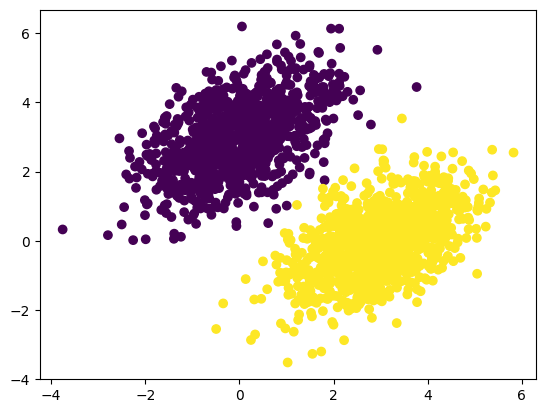

In [34]:
num_samples = 1000

class_1 = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples
)

class_2 = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples
)

inputs = np.vstack((class_1, class_2)).astype(np.float32)
targets = np.vstack((np.zeros((class_1.shape[0],1), dtype='float32'),
                     np.ones((class_2.shape[0],1), dtype='float32')))

plt.scatter(x=inputs[:, 0], y=inputs[:, 1], c=targets[:, 0])
plt.show()


## Training the model

In [35]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f'Loss in step {step}: {loss}')

Loss in step 0: 2.199338436126709
Loss in step 1: 0.1955755650997162
Loss in step 2: 0.1139567494392395
Loss in step 3: 0.0993708074092865
Loss in step 4: 0.09187988191843033
Loss in step 5: 0.08563373982906342
Loss in step 6: 0.0800141915678978
Loss in step 7: 0.07491488754749298
Loss in step 8: 0.0702834501862526
Loss in step 9: 0.06607650965452194
Loss in step 10: 0.0622551292181015
Loss in step 11: 0.05878397077322006
Loss in step 12: 0.05563093721866608
Loss in step 13: 0.052766866981983185
Loss in step 14: 0.05016528442502022
Loss in step 15: 0.04780212789773941
Loss in step 16: 0.04565554857254028
Loss in step 17: 0.04370569437742233
Loss in step 18: 0.0419345423579216
Loss in step 19: 0.04032571241259575
Loss in step 20: 0.03886432945728302
Loss in step 21: 0.03753688186407089
Loss in step 22: 0.03633108362555504
Loss in step 23: 0.035235799849033356
Loss in step 24: 0.03424089029431343
Loss in step 25: 0.03333716094493866
Loss in step 26: 0.03251626342535019
Loss in step 27: 0

## Getting the predictions

In [36]:
predictions = model(inputs)

#### Plotting

We are going to plot the inputs with the predictions we have received from the model. The line that we see in the plot represents our model. Values to the left of the line will be considered to be values from class 0 and the rest will be values from class 1

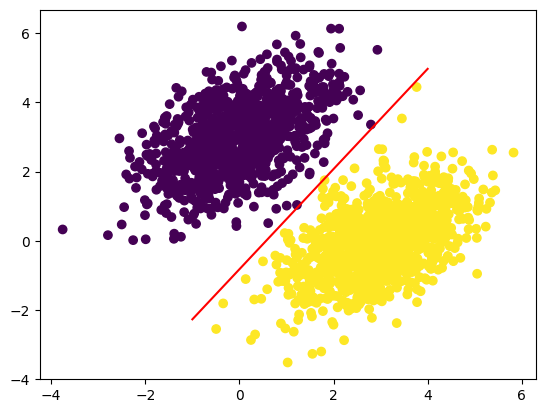

In [37]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x  + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()